In [2]:
!pip install folium

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline

pd.set_option("display.max_columns",None)

import warnings
warnings.filterwarnings("ignore")

  Using cached folium-0.14.0-py2.py3-none-any.whl (102 kB)
  Using cached branca-0.6.0-py3-none-any.whl (24 kB)


In [3]:
#Load the s3 private path
%store -r s3_private_path

In [4]:
# Load and check base data files from public S3 bucket

fires_df = pd.read_csv(s3_private_path+'fires/fires.csv', parse_dates=True)
weather_df = pd.read_csv(s3_private_path+'weather/weather.csv', parse_dates=True)
conditions_df = pd.read_csv(s3_private_path+'conditions/conditions.csv')

In [5]:
fires_df.head()

,ContainmentDateTime,ControlDateTime,DiscoveryAcres,EstimatedCostToDate,FinalAcres,FireBehaviorGeneral,FireBehaviorGeneral1,FireBehaviorGeneral2,FireBehaviorGeneral3,FireCause,FireCauseGeneral,FireCauseSpecific,FireDiscoveryDateTime,FireOutDateTime,GACC,IncidentName,IncidentShortDescription,InitialLatitude,InitialLongitude,IsFireCauseInvestigated,IsTrespass,POOCity,POOState,PredominantFuelModel,PrimaryFuelModel,geohash
0,NaN,NaN,0.10,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,2020/02/28 20:45:40+00,NaN,OSCC,LAC-066100,NaN,33.808980,-118.18070,NaN,NaN,NaN,US-CA,NaN,NaN,8729a5613ffffff
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019/07/01 19:54:00+00,NaN,OSCC,SYCAMORE,NaN,NaN,NaN,NaN,0.0,NaN,US-CA,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016/06/20 22:05:59+00,NaN,ONCC,RATTLESNAKE,NaN,NaN,NaN,NaN,0.0,NaN,US-CA,NaN,NaN,NaN
3,NaN,NaN,0.10,NaN,NaN,NaN,NaN,NaN,NaN,Undetermined,NaN,NaN,2021/11/25 15:17:32+00,NaN,OSCC,E 4TH ST /S D ST,NaN,33.782437,-117.22858,NaN,0.0,NaN,US-CA,NaN,NaN,8729a0131ffffff
4,NaN,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,Undetermined,NaN,NaN,2022/11/21 11:25:33+00,NaN,OSCC,LAC-396331,NaN,33.941810,-118.30902,NaN,NaN,NaN,US-CA,NaN,NaN,8729a56eaffffff


In [6]:
weather_df.head()

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,CDSD,CDSD_ATTRIBUTES,CLDD,CLDD_ATTRIBUTES,DT00,DT00_ATTRIBUTES,DT32,DT32_ATTRIBUTES,DX32,DX32_ATTRIBUTES,DX70,DX70_ATTRIBUTES,DX90,DX90_ATTRIBUTES,EMNT,EMNT_ATTRIBUTES,EMXT,EMXT_ATTRIBUTES,HDSD,HDSD_ATTRIBUTES,HTDD,HTDD_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,geohash
0,USR0000CABS,1995-01,40.3983,-122.8333,579.1,"ARBUCKLE BASIN CALIFORNIA, CA US",0.0,U,0.0,"2,U",0.0,"2,U",6.0,"2,U",7.0,",U",0.0,",U",0.0,",U",-6.1,"2,U,07,",11.1,",U,31,",NaN,NaN,423.9,",U",3.48,"2,U",4.73,",,,U",2.23,"2,,,U",872815ac2ffffff
1,USR0000CABS,1995-02,40.3983,-122.8333,579.1,"ARBUCKLE BASIN CALIFORNIA, CA US",0.0,U,0.0,",U",0.0,",U",0.0,",U",0.0,",U",1.0,",U",0.0,",U",1.1,",U,14,",21.7,",U,22,",NaN,NaN,204.4,",U",11.03,",U",14.43,",,,U",7.64,",,,U",872815ac2ffffff
2,USR0000CABS,1995-03,40.3983,-122.8333,579.1,"ARBUCKLE BASIN CALIFORNIA, CA US",0.0,U,0.0,",U",0.0,",U",9.0,",U",0.0,",U",0.0,",U",0.0,",U",-3.9,",U,06,+",18.9,",U,30,",NaN,NaN,374.8,",U",6.24,",U",9.56,",,,U",2.92,",,,U",872815ac2ffffff
3,USR0000CABS,1995-04,40.3983,-122.8333,579.1,"ARBUCKLE BASIN CALIFORNIA, CA US",0.3,U,0.3,",U",0.0,",U",0.0,",U",0.0,",U",4.0,",U",0.0,",U",3.3,",U,15,",22.2,",U,24,+",NaN,NaN,197.3,",U",11.77,",U",15.80,",,,U",7.74,",,,U",872815ac2ffffff
4,USR0000CABS,1995-05,40.3983,-122.8333,579.1,"ARBUCKLE BASIN CALIFORNIA, CA US",23.1,U,22.8,",U",0.0,",U",0.0,",U",0.0,",U",13.0,",U",0.0,",U",3.3,",U,12,",29.4,",U,29,",NaN,NaN,133.5,",U",14.76,",U",19.31,",,,U",10.21,",,,U",872815ac2ffffff


In [7]:
conditions_df.head()

,PLT_CN,INVYR,COND_STATUS_CD,MAPDEN,STDAGE,STDSZCD,FLDSZCD,SITECLCD,SICOND,STDORGCD,SLOPE,PHYSCLCD,GSSTKCD,DSTRBCD1,TRTCD1,PRESNFCD,FLDAGE,CARBON_DOWN_DEAD,CARBON_LITTER,CARBON_SOIL_ORG,CARBON_STANDING_DEAD,CARBON_UNDERSTORY_AG,CARBON_UNDERSTORY_BG,STATE,WATERCD,LAT,LON,geohash
0,558626924126144,2019,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,0.0,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CA,1.0,40.148215,-121.785534,872815c84ffffff
1,558626925126144,2019,1,1.0,30.0,2.0,2.0,5.0,103.0,1.0,40.0,12.0,4.0,0.0,0.0,NaN,30.0,3.914586,8.104615,18.434625,0.927575,2.274576,0.252731,CA,0.0,40.330908,-121.771399,872815502ffffff
2,558626926126144,2019,1,1.0,NaN,3.0,1.0,4.0,106.0,0.0,35.0,12.0,2.0,0.0,0.0,NaN,998.0,0.338598,14.140916,12.305077,0.404615,1.797825,0.199758,CA,0.0,40.094837,-122.715747,872815ba5ffffff
3,558626893126144,2019,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,NaN,0.0,NaN,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CA,0.0,39.470493,-120.128735,872989a98ffffff
4,558627539126144,2019,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CA,0.0,37.991883,-120.289126,87283648affffff


In [8]:
fires = fires_df.copy()
weather = weather_df.copy()
conditions = conditions_df.copy()

In [9]:
fires.shape 

(89294, 26)

In [10]:
weather.shape

(175300, 35)

In [11]:
conditions.shape

(120208, 28)

In [12]:
fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89294 entries, 0 to 89293
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ContainmentDateTime       35352 non-null  object 
 1   ControlDateTime           32598 non-null  object 
 2   DiscoveryAcres            72321 non-null  float64
 3   EstimatedCostToDate       2128 non-null   float64
 4   FinalAcres                2645 non-null   float64
 5   FireBehaviorGeneral       1498 non-null   object 
 6   FireBehaviorGeneral1      1223 non-null   object 
 7   FireBehaviorGeneral2      1164 non-null   object 
 8   FireBehaviorGeneral3      910 non-null    object 
 9   FireCause                 78093 non-null  object 
 10  FireCauseGeneral          7825 non-null   object 
 11  FireCauseSpecific         2404 non-null   object 
 12  FireDiscoveryDateTime     89294 non-null  object 
 13  FireOutDateTime           32569 non-null  object 
 14  GACC  

In [13]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175300 entries, 0 to 175299
Data columns (total 35 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   STATION          175300 non-null  object 
 1   DATE             175300 non-null  object 
 2   LATITUDE         175300 non-null  float64
 3   LONGITUDE        175300 non-null  float64
 4   ELEVATION        175300 non-null  float64
 5   NAME             175300 non-null  object 
 6   CDSD             148117 non-null  float64
 7   CDSD_ATTRIBUTES  143784 non-null  object 
 8   CLDD             174374 non-null  float64
 9   CLDD_ATTRIBUTES  174374 non-null  object 
 10  DT00             174954 non-null  float64
 11  DT00_ATTRIBUTES  174954 non-null  object 
 12  DT32             174954 non-null  float64
 13  DT32_ATTRIBUTES  174954 non-null  object 
 14  DX32             175086 non-null  float64
 15  DX32_ATTRIBUTES  175086 non-null  object 
 16  DX70             175086 non-null  floa

In [14]:
conditions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120208 entries, 0 to 120207
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   PLT_CN                120208 non-null  int64  
 1   INVYR                 120208 non-null  int64  
 2   COND_STATUS_CD        120208 non-null  int64  
 3   MAPDEN                48111 non-null   float64
 4   STDAGE                50653 non-null   float64
 5   STDSZCD               52176 non-null   float64
 6   FLDSZCD               48111 non-null   float64
 7   SITECLCD              54682 non-null   float64
 8   SICOND                45612 non-null   float64
 9   STDORGCD              48111 non-null   float64
 10  SLOPE                 53696 non-null   float64
 11  PHYSCLCD              52526 non-null   float64
 12  GSSTKCD               52899 non-null   float64
 13  DSTRBCD1              52839 non-null   float64
 14  TRTCD1                49857 non-null   float64
 15  

In [15]:
fires.nunique()

ContainmentDateTime         33145
ControlDateTime             30429
DiscoveryAcres                348
EstimatedCostToDate          1040
FinalAcres                    345
FireBehaviorGeneral             4
FireBehaviorGeneral1           16
FireBehaviorGeneral2           16
FireBehaviorGeneral3           16
FireCause                       4
FireCauseGeneral               14
FireCauseSpecific              66
FireDiscoveryDateTime       88063
FireOutDateTime             28455
GACC                            7
IncidentName                57750
IncidentShortDescription     1346
InitialLatitude             60066
InitialLongitude            54127
IsFireCauseInvestigated         2
IsTrespass                      2
POOCity                       707
POOState                        3
PredominantFuelModel           42
PrimaryFuelModel               12
geohash                     29392
dtype: int64

In [16]:
fires.columns

Index(['ContainmentDateTime', 'ControlDateTime', 'DiscoveryAcres',
       'EstimatedCostToDate', 'FinalAcres', 'FireBehaviorGeneral',
       'FireBehaviorGeneral1', 'FireBehaviorGeneral2', 'FireBehaviorGeneral3',
       'FireCause', 'FireCauseGeneral', 'FireCauseSpecific',
       'FireDiscoveryDateTime', 'FireOutDateTime', 'GACC', 'IncidentName',
       'IncidentShortDescription', 'InitialLatitude', 'InitialLongitude',
       'IsFireCauseInvestigated', 'IsTrespass', 'POOCity', 'POOState',
       'PredominantFuelModel', 'PrimaryFuelModel', 'geohash'],
      dtype='object')

In [17]:
weather.nunique()

STATION              610
DATE                 461
LATITUDE             600
LONGITUDE            590
ELEVATION            472
NAME                 610
CDSD               11831
CDSD_ATTRIBUTES        1
CLDD                4080
CLDD_ATTRIBUTES        6
DT00                  27
DT00_ATTRIBUTES        8
DT32                  32
DT32_ATTRIBUTES        6
DX32                  32
DX32_ATTRIBUTES        6
DX70                  32
DX70_ATTRIBUTES        6
DX90                  32
DX90_ATTRIBUTES        6
EMNT                 420
EMNT_ATTRIBUTES      352
EMXT                 359
EMXT_ATTRIBUTES      352
HDSD               40090
HDSD_ATTRIBUTES        1
HTDD                8372
HTDD_ATTRIBUTES        6
TAVG                4619
TAVG_ATTRIBUTES       10
TMAX                4886
TMAX_ATTRIBUTES        6
TMIN                4579
TMIN_ATTRIBUTES        6
geohash              605
dtype: int64

In [18]:
conditions.nunique()

PLT_CN                  94231
INVYR                      21
COND_STATUS_CD              5
MAPDEN                      3
STDAGE                    488
STDSZCD                     4
FLDSZCD                     6
SITECLCD                    7
SICOND                    175
STDORGCD                    2
SLOPE                     138
PHYSCLCD                   16
GSSTKCD                     5
DSTRBCD1                   30
TRTCD1                      6
PRESNFCD                   19
FLDAGE                    489
CARBON_DOWN_DEAD        44259
CARBON_LITTER            1761
CARBON_SOIL_ORG            31
CARBON_STANDING_DEAD    41646
CARBON_UNDERSTORY_AG    41041
CARBON_UNDERSTORY_BG    35749
STATE                       3
WATERCD                     8
LAT                     55559
LON                     55264
geohash                 51342
dtype: int64

In [19]:
fires.describe(include='all')

,ContainmentDateTime,ControlDateTime,DiscoveryAcres,EstimatedCostToDate,FinalAcres,FireBehaviorGeneral,FireBehaviorGeneral1,FireBehaviorGeneral2,FireBehaviorGeneral3,FireCause,FireCauseGeneral,FireCauseSpecific,FireDiscoveryDateTime,FireOutDateTime,GACC,IncidentName,IncidentShortDescription,InitialLatitude,InitialLongitude,IsFireCauseInvestigated,IsTrespass,POOCity,POOState,PredominantFuelModel,PrimaryFuelModel,geohash
count,35352,32598,72321.000000,2.128000e+03,2645.000000,1498,1223,1164,910,78093,7825,2404,89294,32569,89277,89294,1396,73610.000000,73610.000000,2375.000000,57102.000000,1090,89294,7035,1730,73610
unique,33145,30429,NaN,NaN,NaN,4,16,16,16,4,14,66,88063,28455,7,57750,1346,NaN,NaN,NaN,NaN,707,3,42,12,29392
top,2021/10/18 18:59:59+00,2017/11/01 18:59:59+00,NaN,NaN,NaN,Minimal,Smoldering,Smoldering,Smoldering,Undetermined,Lightning,Campfire,2018/07/15 15:00:00+00,2021/12/03 23:00:00+00,OSCC,RIVER,Wildfire,NaN,NaN,NaN,NaN,Leavenworth,US-CA,GS2,Timber (Litter and Understory),8729a56f2ffffff
freq,13,13,NaN,NaN,NaN,1397,807,481,305,30061,2407,429,31,30,40222,178,21,NaN,NaN,NaN,NaN,10,60781,1091,402,384
mean,NaN,NaN,5.828998,8.193477e+06,14.782858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.040975,-119.656640,0.790737,0.104340,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,499.525591,3.444001e+07,317.275301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.967955,2.929914,0.406868,0.305703,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000,0.000000e+00,0.010000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-134.550003,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,0.100000,1.000000e+05,0.010000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.117710,-121.518485,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,0.100000,6.002500e+05,0.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.225912,-119.402774,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,0.100000,3.619750e+06,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.347543,-118.008125,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN


In [20]:
weather.describe(include='all')

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,CDSD,CDSD_ATTRIBUTES,CLDD,CLDD_ATTRIBUTES,DT00,DT00_ATTRIBUTES,DT32,DT32_ATTRIBUTES,DX32,DX32_ATTRIBUTES,DX70,DX70_ATTRIBUTES,DX90,DX90_ATTRIBUTES,EMNT,EMNT_ATTRIBUTES,EMXT,EMXT_ATTRIBUTES,HDSD,HDSD_ATTRIBUTES,HTDD,HTDD_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,geohash
count,175300,175300,175300.000000,175300.000000,175300.000000,175300,148117.000000,143784,174374.00000,174374,174954.000000,174954,174954.000000,174954,175086.000000,175086,175086.000000,175086,175086.000000,175086,174954.000000,174954,175086.000000,175086,151739.000000,146766,174374.000000,174374,174740.000000,174740,175086.000000,175086,174954.000000,174954,175300
unique,610,461,NaN,NaN,NaN,610,NaN,1,NaN,6,NaN,8,NaN,6,NaN,6,NaN,6,NaN,6,NaN,352,NaN,352,NaN,1,NaN,6,NaN,10,NaN,6,NaN,6,605
top,USR0000CRIF,2003-10,NaN,NaN,NaN,"RIFLE COLORADO, CO US",NaN,U,NaN,",U",NaN,",U",NaN,",U",NaN,",U",NaN,",U",NaN,",U",NaN,",U,01,",NaN,",U,01,",NaN,U,NaN,",U",NaN,",U",NaN,",,,U",NaN,",,,U",8729ab19effffff
freq,449,552,NaN,NaN,NaN,449,NaN,143784,NaN,156786,NaN,158514,NaN,158516,NaN,159022,NaN,159022,NaN,159022,NaN,7354,NaN,7571,NaN,146766,NaN,158895,NaN,156786,NaN,159022,NaN,158516,549
mean,NaN,NaN,40.126042,-117.956903,1214.025041,NaN,182.813899,NaN,33.99427,NaN,0.221675,NaN,8.604679,NaN,1.266743,NaN,12.346276,NaN,2.843483,NaN,-1.734635,NaN,26.111398,NaN,1268.488038,NaN,241.902394,NaN,11.378812,NaN,17.773467,NaN,4.984015,NaN,NaN
std,NaN,NaN,3.892202,6.284635,734.270284,NaN,315.507762,NaN,67.23642,NaN,1.222545,NaN,10.725211,NaN,3.648730,NaN,11.945069,NaN,6.382687,NaN,8.876591,NaN,8.980079,NaN,1298.003073,NaN,201.339504,NaN,8.162093,NaN,9.350916,NaN,7.406624,NaN,NaN
min,NaN,NaN,32.605800,-124.417500,0.000000,NaN,0.000000,NaN,0.00000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,-41.100000,NaN,-3.300000,NaN,0.000000,NaN,0.000000,NaN,-17.110000,NaN,-11.130000,NaN,-24.060000,NaN,NaN
25%,NaN,NaN,37.231900,-121.983300,609.600000,NaN,0.000000,NaN,0.00000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,-6.700000,NaN,19.400000,NaN,116.600000,NaN,58.200000,NaN,5.370000,NaN,10.570000,NaN,-0.110000,NaN,NaN
50%,NaN,NaN,40.186700,-120.075000,1173.200000,NaN,32.800000,NaN,0.30000,NaN,0.000000,NaN,2.000000,NaN,0.000000,NaN,9.000000,NaN,0.000000,NaN,-1.000000,NaN,26.700000,NaN,864.900000,NaN,207.600000,NaN,11.520000,NaN,17.760000,NaN,5.195000,NaN,NaN
75%,NaN,NaN,43.340000,-117.375000,1676.700000,NaN,235.500000,NaN,35.20000,NaN,0.000000,NaN,17.000000,NaN,0.000000,NaN,25.000000,NaN,2.000000,NaN,4.400000,NaN,33.300000,NaN,2088.850000,NaN,388.700000,NaN,17.530000,NaN,25.040000,NaN,10.270000,NaN,NaN


In [21]:
conditions.describe(include='all')

,PLT_CN,INVYR,COND_STATUS_CD,MAPDEN,STDAGE,STDSZCD,FLDSZCD,SITECLCD,SICOND,STDORGCD,SLOPE,PHYSCLCD,GSSTKCD,DSTRBCD1,TRTCD1,PRESNFCD,FLDAGE,CARBON_DOWN_DEAD,CARBON_LITTER,CARBON_SOIL_ORG,CARBON_STANDING_DEAD,CARBON_UNDERSTORY_AG,CARBON_UNDERSTORY_BG,STATE,WATERCD,LAT,LON,geohash
count,1.202080e+05,120208.000000,120208.000000,48111.000000,50653.000000,52176.000000,48111.000000,54682.000000,45612.000000,48111.000000,53696.000000,52526.000000,52899.000000,52839.000000,49857.000000,45255.000000,48111.000000,48111.000000,65112.000000,65112.000000,48111.000000,65112.000000,65112.000000,120208,67161.000000,119324.000000,119324.000000,119324
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,51342
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OR,NaN,NaN,NaN,87281194effffff
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47382,NaN,NaN,NaN,14
mean,1.277458e+14,2008.354327,1.758294,1.014279,93.485874,1.546381,2.709651,4.608829,90.704201,0.152003,31.471469,20.016163,3.000265,7.169666,1.128427,22.896210,132.356010,6.353399,10.208599,23.078987,4.985415,0.960920,0.106769,NaN,0.653058,42.225349,-120.510403,NaN
std,1.749621e+14,6.900266,0.987397,0.120035,95.621114,0.987878,0.969147,1.649966,26.851860,0.359027,23.896782,4.643882,1.103735,15.052914,4.571047,9.073261,198.236884,22.567978,7.651844,17.298744,4.713557,1.085563,0.120618,NaN,1.554638,4.376455,2.258775,NaN
min,1.000000e+00,1994.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,7.000000,0.000000,0.000000,11.000000,1.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,32.552600,-124.799169,NaN
25%,2.293116e+13,2003.000000,1.000000,1.000000,38.000000,1.000000,2.000000,3.000000,72.000000,0.000000,10.000000,19.000000,2.000000,0.000000,0.000000,20.000000,43.000000,2.170612,0.000000,0.000000,1.845079,0.000000,0.000000,NaN,0.000000,38.800982,-122.288066,NaN
50%,3.076194e+13,2009.000000,2.000000,1.000000,75.000000,1.000000,3.000000,5.000000,90.000000,0.000000,27.000000,22.000000,3.000000,0.000000,0.000000,20.000000,82.000000,4.569980,10.625089,22.612150,3.845740,1.050817,0.116758,NaN,0.000000,43.159040,-120.786816,NaN
75%,2.169613e+14,2014.000000,2.000000,1.000000,115.000000,2.000000,3.000000,6.000000,110.000000,0.000000,49.000000,23.000000,4.000000,0.000000,0.000000,31.000000,130.000000,8.745070,15.820146,42.272428,7.225233,1.428948,0.158772,NaN,0.000000,45.549235,-118.744926,NaN


In [22]:
fires['ContainmentDateTime'] = pd.to_datetime(fires['ContainmentDateTime'])
fires['ControlDateTime'] = pd.to_datetime(fires['ControlDateTime'])
fires['EstimatedCostToDate'] = pd.to_datetime(fires['EstimatedCostToDate'])
fires['FireDiscoveryDateTime'] = pd.to_datetime(fires['FireDiscoveryDateTime'])
fires['FireOutDateTime'] = pd.to_datetime(fires['FireOutDateTime'])

In [23]:
print(fires.dtypes)

ContainmentDateTime         datetime64[ns, UTC]
ControlDateTime             datetime64[ns, UTC]
DiscoveryAcres                          float64
EstimatedCostToDate              datetime64[ns]
FinalAcres                              float64
FireBehaviorGeneral                      object
FireBehaviorGeneral1                     object
FireBehaviorGeneral2                     object
FireBehaviorGeneral3                     object
FireCause                                object
FireCauseGeneral                         object
FireCauseSpecific                        object
FireDiscoveryDateTime       datetime64[ns, UTC]
FireOutDateTime             datetime64[ns, UTC]
GACC                                     object
IncidentName                             object
IncidentShortDescription                 object
InitialLatitude                         float64
InitialLongitude                        float64
IsFireCauseInvestigated                 float64
IsTrespass                              

In [24]:
print(weather.dtypes)

STATION             object
DATE                object
LATITUDE           float64
LONGITUDE          float64
ELEVATION          float64
NAME                object
CDSD               float64
CDSD_ATTRIBUTES     object
CLDD               float64
CLDD_ATTRIBUTES     object
DT00               float64
DT00_ATTRIBUTES     object
DT32               float64
DT32_ATTRIBUTES     object
DX32               float64
DX32_ATTRIBUTES     object
DX70               float64
DX70_ATTRIBUTES     object
DX90               float64
DX90_ATTRIBUTES     object
EMNT               float64
EMNT_ATTRIBUTES     object
EMXT               float64
EMXT_ATTRIBUTES     object
HDSD               float64
HDSD_ATTRIBUTES     object
HTDD               float64
HTDD_ATTRIBUTES     object
TAVG               float64
TAVG_ATTRIBUTES     object
TMAX               float64
TMAX_ATTRIBUTES     object
TMIN               float64
TMIN_ATTRIBUTES     object
geohash             object
dtype: object


In [25]:
print(conditions.dtypes)

PLT_CN                    int64
INVYR                     int64
COND_STATUS_CD            int64
MAPDEN                  float64
STDAGE                  float64
STDSZCD                 float64
FLDSZCD                 float64
SITECLCD                float64
SICOND                  float64
STDORGCD                float64
SLOPE                   float64
PHYSCLCD                float64
GSSTKCD                 float64
DSTRBCD1                float64
TRTCD1                  float64
PRESNFCD                float64
FLDAGE                  float64
CARBON_DOWN_DEAD        float64
CARBON_LITTER           float64
CARBON_SOIL_ORG         float64
CARBON_STANDING_DEAD    float64
CARBON_UNDERSTORY_AG    float64
CARBON_UNDERSTORY_BG    float64
STATE                    object
WATERCD                 float64
LAT                     float64
LON                     float64
geohash                  object
dtype: object


In [26]:
# fires.filter(like='Date').apply(pd.to_datetime)

# print(fires.dtypes)

In [27]:
fires.isnull().sum() 

ContainmentDateTime         53942
ControlDateTime             56696
DiscoveryAcres              16973
EstimatedCostToDate         87166
FinalAcres                  86649
FireBehaviorGeneral         87796
FireBehaviorGeneral1        88071
FireBehaviorGeneral2        88130
FireBehaviorGeneral3        88384
FireCause                   11201
FireCauseGeneral            81469
FireCauseSpecific           86890
FireDiscoveryDateTime           0
FireOutDateTime             56725
GACC                           17
IncidentName                    0
IncidentShortDescription    87898
InitialLatitude             15684
InitialLongitude            15684
IsFireCauseInvestigated     86919
IsTrespass                  32192
POOCity                     88204
POOState                        0
PredominantFuelModel        82259
PrimaryFuelModel            87564
geohash                     15684
dtype: int64

In [28]:
weather.isnull().sum()

STATION                0
DATE                   0
LATITUDE               0
LONGITUDE              0
ELEVATION              0
NAME                   0
CDSD               27183
CDSD_ATTRIBUTES    31516
CLDD                 926
CLDD_ATTRIBUTES      926
DT00                 346
DT00_ATTRIBUTES      346
DT32                 346
DT32_ATTRIBUTES      346
DX32                 214
DX32_ATTRIBUTES      214
DX70                 214
DX70_ATTRIBUTES      214
DX90                 214
DX90_ATTRIBUTES      214
EMNT                 346
EMNT_ATTRIBUTES      346
EMXT                 214
EMXT_ATTRIBUTES      214
HDSD               23561
HDSD_ATTRIBUTES    28534
HTDD                 926
HTDD_ATTRIBUTES      926
TAVG                 560
TAVG_ATTRIBUTES      560
TMAX                 214
TMAX_ATTRIBUTES      214
TMIN                 346
TMIN_ATTRIBUTES      346
geohash                0
dtype: int64

In [29]:
weather['DATE'] = pd.to_datetime(weather['DATE'])

In [30]:
print(weather.dtypes)

STATION                    object
DATE               datetime64[ns]
LATITUDE                  float64
LONGITUDE                 float64
ELEVATION                 float64
NAME                       object
CDSD                      float64
CDSD_ATTRIBUTES            object
CLDD                      float64
CLDD_ATTRIBUTES            object
DT00                      float64
DT00_ATTRIBUTES            object
DT32                      float64
DT32_ATTRIBUTES            object
DX32                      float64
DX32_ATTRIBUTES            object
DX70                      float64
DX70_ATTRIBUTES            object
DX90                      float64
DX90_ATTRIBUTES            object
EMNT                      float64
EMNT_ATTRIBUTES            object
EMXT                      float64
EMXT_ATTRIBUTES            object
HDSD                      float64
HDSD_ATTRIBUTES            object
HTDD                      float64
HTDD_ATTRIBUTES            object
TAVG                      float64
TAVG_ATTRIBUTE

In [31]:
fires.groupby('FireCause').size()

FireCause
Human           15161
Natural         12504
Undetermined    30061
Unknown         20367
dtype: int64

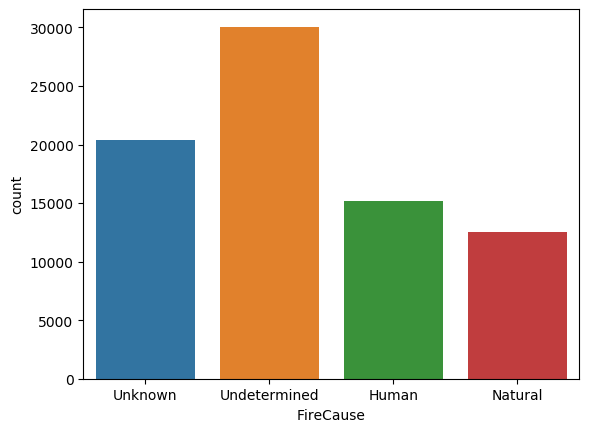

In [32]:
sns.countplot(x = 'FireCause', data=fires)

In [33]:
numerical_features_w = weather.select_dtypes(include=["number"])
numerical_features_w = numerical_features_w.drop(["LONGITUDE", "LATITUDE"], axis=1)
numerical_features_w.head()

,ELEVATION,CDSD,CLDD,DT00,DT32,DX32,DX70,DX90,EMNT,EMXT,HDSD,HTDD,TAVG,TMAX,TMIN
0,579.1,0.0,0.0,0.0,6.0,7.0,0.0,0.0,-6.1,11.1,NaN,423.9,3.48,4.73,2.23
1,579.1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.1,21.7,NaN,204.4,11.03,14.43,7.64
2,579.1,0.0,0.0,0.0,9.0,0.0,0.0,0.0,-3.9,18.9,NaN,374.8,6.24,9.56,2.92
3,579.1,0.3,0.3,0.0,0.0,0.0,4.0,0.0,3.3,22.2,NaN,197.3,11.77,15.80,7.74
4,579.1,23.1,22.8,0.0,0.0,0.0,13.0,0.0,3.3,29.4,NaN,133.5,14.76,19.31,10.21


In [34]:
numerical_features_f = fires.select_dtypes(include=["number"])
numerical_features_f = numerical_features_f.drop(["InitialLongitude", "InitialLatitude"], axis=1)
numerical_features_f.head()

,DiscoveryAcres,FinalAcres,IsFireCauseInvestigated,IsTrespass
0,0.10,NaN,NaN,NaN
1,NaN,NaN,NaN,0.0
2,NaN,NaN,NaN,0.0
3,0.10,NaN,NaN,0.0
4,0.01,NaN,NaN,NaN


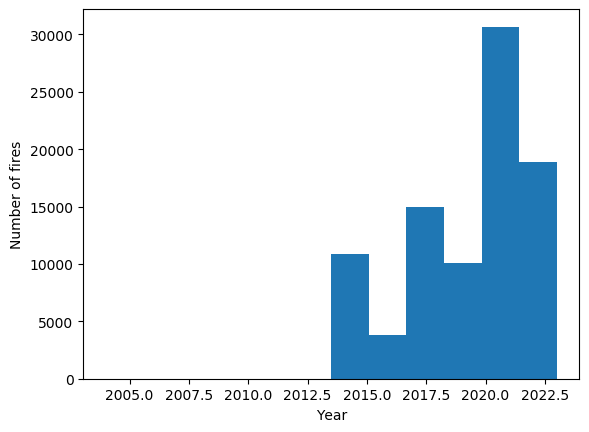

In [35]:
# Extract the year from the FireDiscoveryDateTime column
fires['Year'] = fires['FireDiscoveryDateTime'].dt.year
fires['month'] = fires['FireDiscoveryDateTime'].dt.month
fires['day'] = fires['FireDiscoveryDateTime'].dt.day  

# Count the number of fires in each year
fires_by_year = fires['Year'].value_counts()

# Create a histogram of the number of fires in each year
plt.hist(fires['Year'], bins=len(fires_by_year))
plt.xlabel('Year')
plt.ylabel('Number of fires')
plt.show()

In [36]:
# Drop rows with missing latitude or longitude values
fires = fires.dropna(subset=['InitialLatitude', 'InitialLongitude'])

In [37]:
# Create a map centered on the US
mapb = folium.Map(location=[39.8283, -98.5795], zoom_start=4)

# Add a marker for each fire location
# for index, row in fires.iterrows():
#     folium.Marker([row['InitialLatitude'], row['InitialLongitude']]).add_to(map)

# Show the map
# map

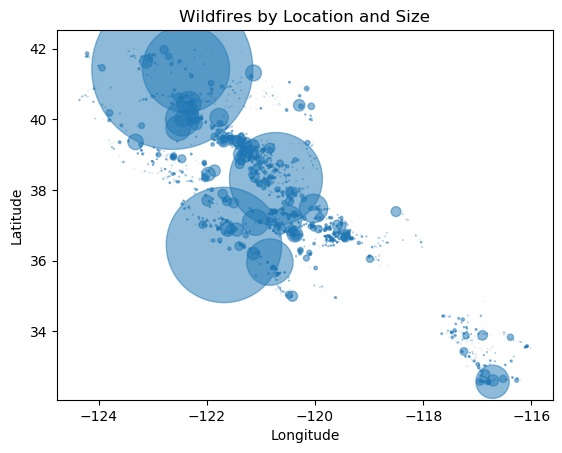

In [38]:
# Fire damage

plt.scatter(fires['InitialLongitude'], fires['InitialLatitude'], s=fires['FinalAcres'], alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Wildfires by Location and Size')
plt.show()

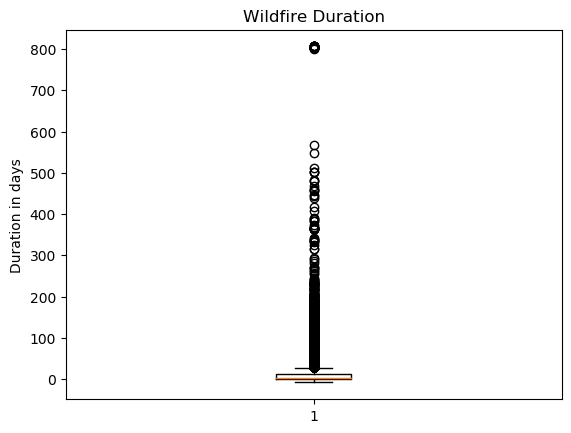

In [39]:
# Box Plot of Fire Duration
fires['duration'] = fires['FireOutDateTime'] - fires['FireDiscoveryDateTime']
plt.boxplot(fires['duration'].dt.days.dropna())
plt.ylabel('Duration in days')
plt.title('Wildfire Duration')
plt.show()

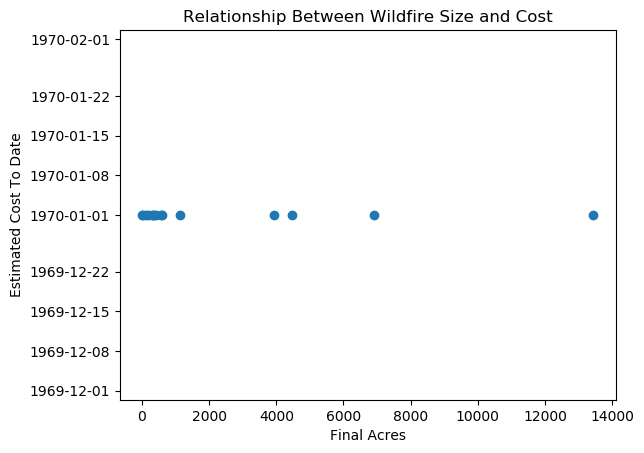

In [40]:
# Scatterplot to show cost vs acres of damage
subset = fires[['EstimatedCostToDate', 'FinalAcres']]

subset = subset.dropna()

# Create scatter plot
plt.scatter(subset['FinalAcres'], subset['EstimatedCostToDate'])
plt.xlabel('Final Acres')
plt.ylabel('Estimated Cost To Date')
plt.title('Relationship Between Wildfire Size and Cost')
plt.show()

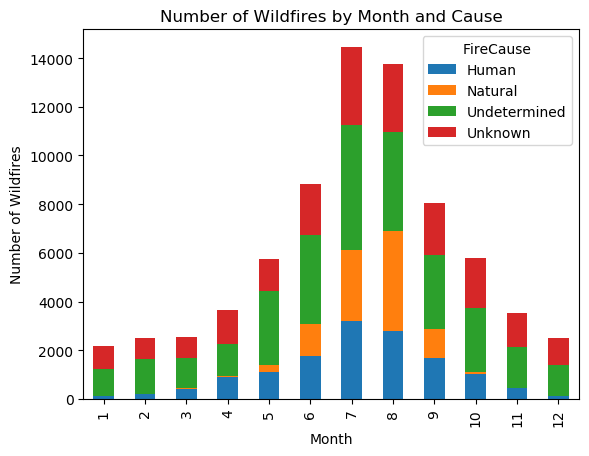

In [41]:
# Stacked bar graph to see wildfires by month and any seasonal patterns between the causes
subset = fires[['FireCause', 'FireDiscoveryDateTime']]

subset = subset.dropna()

grouped = subset.groupby([subset['FireDiscoveryDateTime'].dt.month, 'FireCause']).size().unstack()

grouped.plot(kind='bar', stacked=True)
plt.xlabel('Month')
plt.ylabel('Number of Wildfires')
plt.title('Number of Wildfires by Month and Cause')
plt.show()

In [42]:
# Drop rows with missing latitude or longitude values
weather = weather.dropna(subset=['LATITUDE', 'LONGITUDE'])

In [43]:
fires['FireDiscoveryDateTime'] = fires['FireDiscoveryDateTime'].dt.tz_localize(None) #remove timezone

In [44]:
merged_df00 = pd.merge(fires, weather, how='left', left_on=['FireDiscoveryDateTime', 'InitialLongitude', 'InitialLatitude'], 
                     right_on=['DATE', 'LONGITUDE', 'LATITUDE'])

In [45]:
merged_df00.head()

,ContainmentDateTime,ControlDateTime,DiscoveryAcres,EstimatedCostToDate,FinalAcres,FireBehaviorGeneral,FireBehaviorGeneral1,FireBehaviorGeneral2,FireBehaviorGeneral3,FireCause,FireCauseGeneral,FireCauseSpecific,FireDiscoveryDateTime,FireOutDateTime,GACC,IncidentName,IncidentShortDescription,InitialLatitude,InitialLongitude,IsFireCauseInvestigated,IsTrespass,POOCity,POOState,PredominantFuelModel,PrimaryFuelModel,geohash_x,Year,month,day,duration,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,CDSD,CDSD_ATTRIBUTES,CLDD,CLDD_ATTRIBUTES,DT00,DT00_ATTRIBUTES,DT32,DT32_ATTRIBUTES,DX32,DX32_ATTRIBUTES,DX70,DX70_ATTRIBUTES,DX90,DX90_ATTRIBUTES,EMNT,EMNT_ATTRIBUTES,EMXT,EMXT_ATTRIBUTES,HDSD,HDSD_ATTRIBUTES,HTDD,HTDD_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,geohash_y
0,NaT,NaT,0.10,NaT,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,2020-02-28 20:45:40,NaT,OSCC,LAC-066100,NaN,33.808980,-118.180700,NaN,NaN,NaN,US-CA,NaN,NaN,8729a5613ffffff,2020,2,28,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaT,NaT,0.10,NaT,NaN,NaN,NaN,NaN,NaN,Undetermined,NaN,NaN,2021-11-25 15:17:32,NaT,OSCC,E 4TH ST /S D ST,NaN,33.782437,-117.228580,NaN,0.0,NaN,US-CA,NaN,NaN,8729a0131ffffff,2021,11,25,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaT,NaT,0.01,NaT,NaN,NaN,NaN,NaN,NaN,Undetermined,NaN,NaN,2022-11-21 11:25:33,NaT,OSCC,LAC-396331,NaN,33.941810,-118.309020,NaN,NaN,NaN,US-CA,NaN,NaN,8729a56eaffffff,2022,11,21,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaT,NaT,0.10,NaT,NaN,NaN,NaN,NaN,NaN,Undetermined,NaN,NaN,2017-08-27 14:33:32,NaT,NWCC,SILVIES RX,NaN,43.898380,-118.939900,NaN,0.0,NaN,US-OR,NaN,NaN,8728aa828ffffff,2017,8,27,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaT,NaT,0.10,NaT,NaN,NaN,NaN,NaN,NaN,Undetermined,NaN,NaN,2017-10-09 14:50:17,NaT,OSCC,LAC-302109,NaN,34.201481,-118.678009,NaN,NaN,NaN,US-CA,NaN,NaN,8729a1852ffffff,2017,10,9,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# update dataframes to merge all three - ATTEMPT
#merged_df00['POOState'] = merged_df00['POOState'].str.replace('US-', '')
#merged_df00.head(5)

In [47]:
#merged_df['POOState'].value_counts() #see number of occurrences in each state

In [48]:
#merged_df2 = pd.merge(merged_df, conditions_df, how='left', left_on='POOState', right_on='STATE')
#merged_df2.head(2)

# Store Variables and Close Session

In [49]:
# Store variables for subsequent notebooks
%store

Stored variables and their in-db values:
auto_ml_job_name                                      -> 'automl-dm-30-03-35-20'
autopilot_endpoint_arn                                -> 'arn:aws:sagemaker:us-east-1:857283526476:endpoint
autopilot_endpoint_wf                                 -> 'automl-dm-ep-30-04-47-49'
autopilot_model_arn_wf                                -> 'arn:aws:sagemaker:us-east-1:857283526476:model/au
autopilot_model_wf                                    -> 'automl-dm-model-30-04-47-47'
autopilot_train_s3_uri                                -> 's3://sagemaker-us-east-1-857283526476/data/amazon
autopilot_train_s3_wf                                 -> 's3://sagemaker-us-east-1-857283526476/data/wildfi
balanced_bias_data_jsonlines_s3_uri                   -> 's3://sagemaker-us-east-1-857283526476/bias-detect
balanced_bias_data_s3_uri                             -> 's3://sagemaker-us-east-1-857283526476/bias-detect
bias_data_s3_uri                                      -> 's

In [50]:
%%html

<p><b>Shutting down your kernel for this notebook to release resources.</b></p>
<button class="sm-command-button" data-commandlinker-command="kernelmenu:shutdown" style="display:none;">Shutdown Kernel</button>
        
<script>
try {
    els = document.getElementsByClassName("sm-command-button");
    els[0].click();
}
catch(err) {
    // NoOp
}    
</script>

In [51]:
%%javascript

try {
    Jupyter.notebook.save_checkpoint();
    Jupyter.notebook.session.delete();
}
catch(err) {
    // NoOp
}

<IPython.core.display.Javascript object>